In [32]:
!pip install sktime

  You can safely remove it manually.
  You can safely remove it manually.



   ---------------------------------------- 0.0/21.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/21.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/21.9 MB 640.0 kB/s eta 0:00:35
   ---------------------------------------- 0.0/21.9 MB 487.6 kB/s eta 0:00:45
   ---------------------------------------- 0.1/21.9 MB 1.1 MB/s eta 0:00:21
   ---------------------------------------- 0.3/21.9 MB 1.3 MB/s eta 0:00:17
    --------------------------------------- 0.4/21.9 MB 1.9 MB/s eta 0:00:12
   - -------------------------------------- 0.6/21.9 MB 2.3 MB/s eta 0:00:10
   - -------------------------------------- 0.6/21.9 MB 2.2 MB/s eta 0:00:10
   - -------------------------------------- 0.7/21.9 MB 1.9 MB/s eta 0:00:12
   - -------------------------------------- 0.8/21.9 MB 2.1 MB/s eta 0:00:11
   - -------------------------------------- 1.0/21.9 MB 2.2 MB/s eta 0:00:10
   -- ------------------------------------- 1.1/21.9 MB 2.3 MB/s eta 0:00:10
   -- --

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pathlib import Path
from matrixprofile import *
from matrixprofile.discords import discords
import stumpy

In [2]:
path = Path("dataset/dataset/time_series")

def load_npy(filename):
    with open(filename, 'rb') as f:
        return np.load(f)

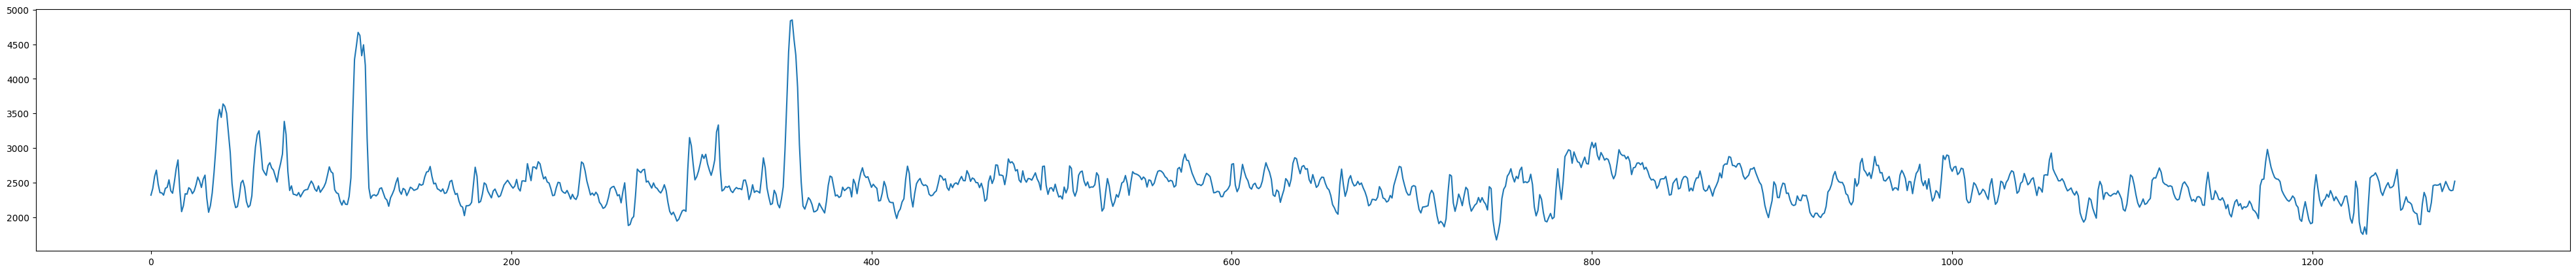

In [48]:
ts_test = "00C93bsNIjHStKvr1lPJee_heavy-metal"

ts = load_npy(path / (ts_test + ".npy"))
plt.figure().set_figwidth(50)
plt.plot(ts);

In [18]:
files = path.glob('**/*')
files = [file for file in files]
input_dict = {}
for file in files:
    input_dict[file.stem] = load_npy(file)

In [19]:
category_dict = {}

for file in files:
    label = file.stem.split("_")[1]
    if label in category_dict:
        category_dict[label].append(input_dict[file.stem])
    else:
        category_dict[label] = [input_dict[file.stem]]

In [20]:
assert len(files) == 20 * 500

for key in category_dict:
    assert 500 == len(category_dict[key])
assert len(category_dict.keys()) == 20

<Figure size 640x200 with 0 Axes>

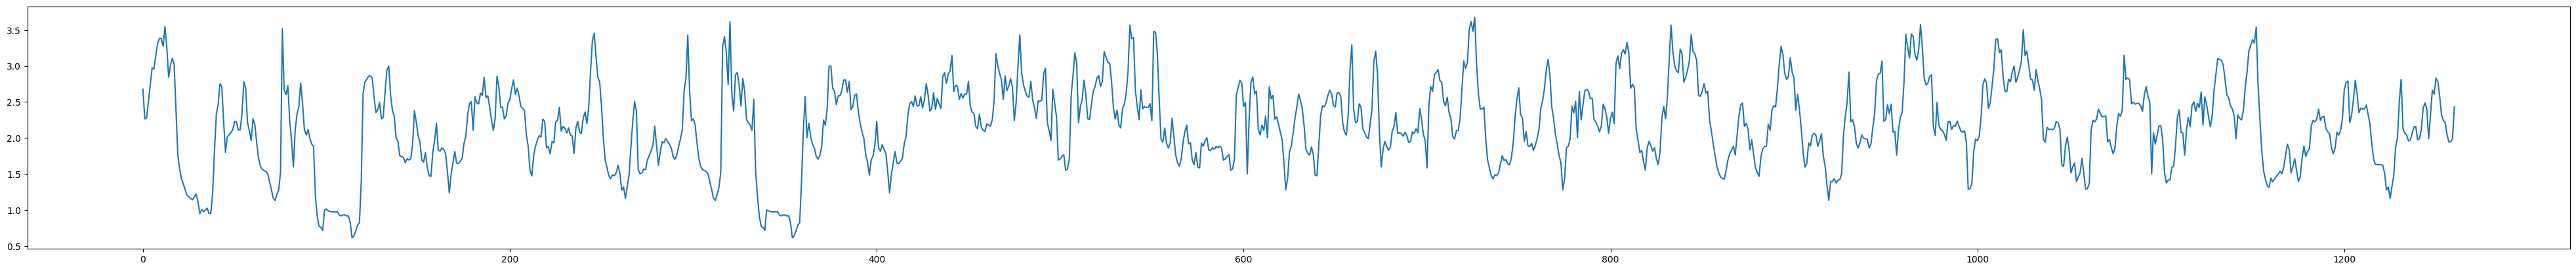

In [41]:
w = 20
mp, mpi = matrixProfile.stomp(ts, w)
    
plt.figure().set_figheight(2)
plt.figure().set_figwidth(50)
plt.plot(mp)
plt.show()

In [22]:
len(ts), len(mpi), len(list(set(mpi)))

(1280, 1261, 769)

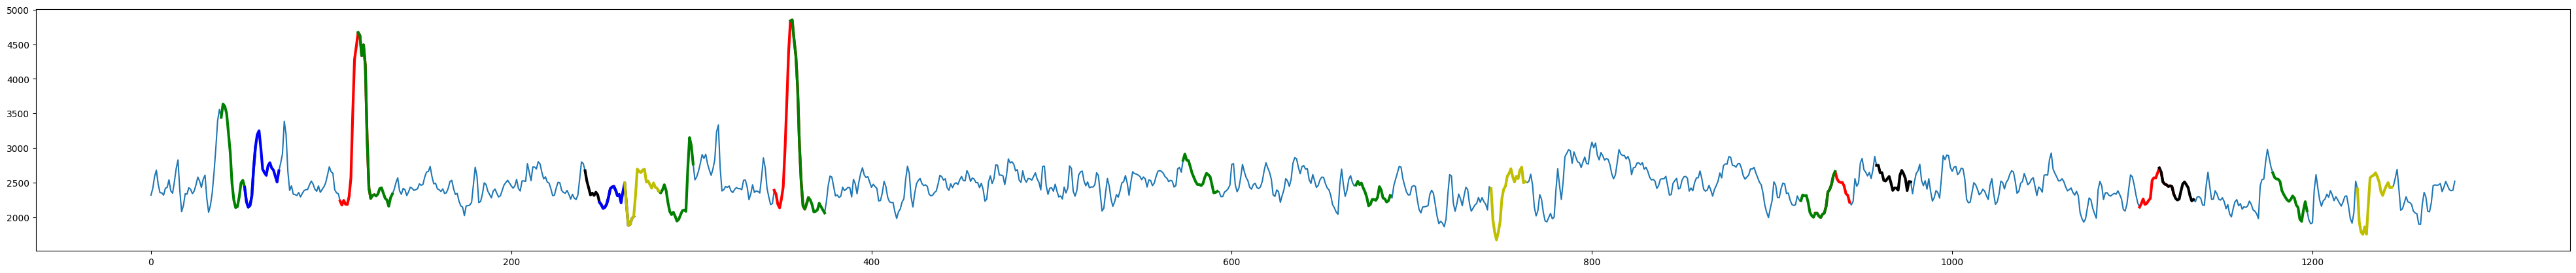

In [40]:
mo, mod  = motifs.motifs(ts, (mp, mpi), max_motifs=5)
plt.figure().set_figwidth(50)
plt.plot(ts)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

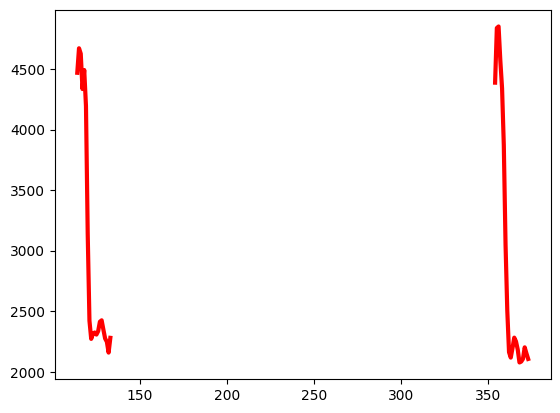

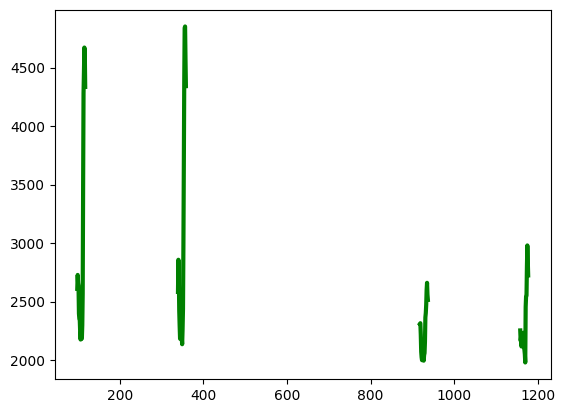

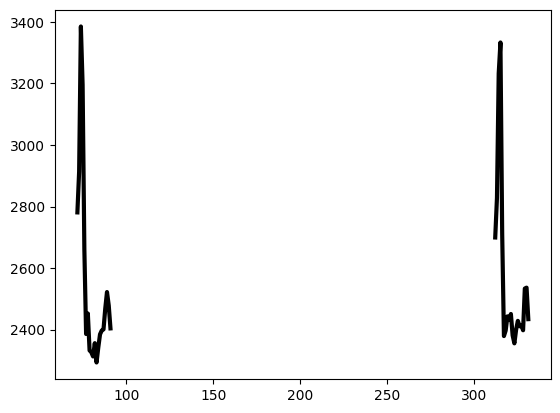

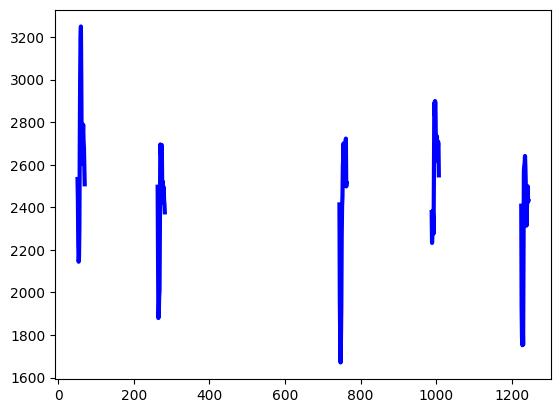

In [24]:
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

In [25]:
anoms = discords(mp, ex_zone=3, k=5)

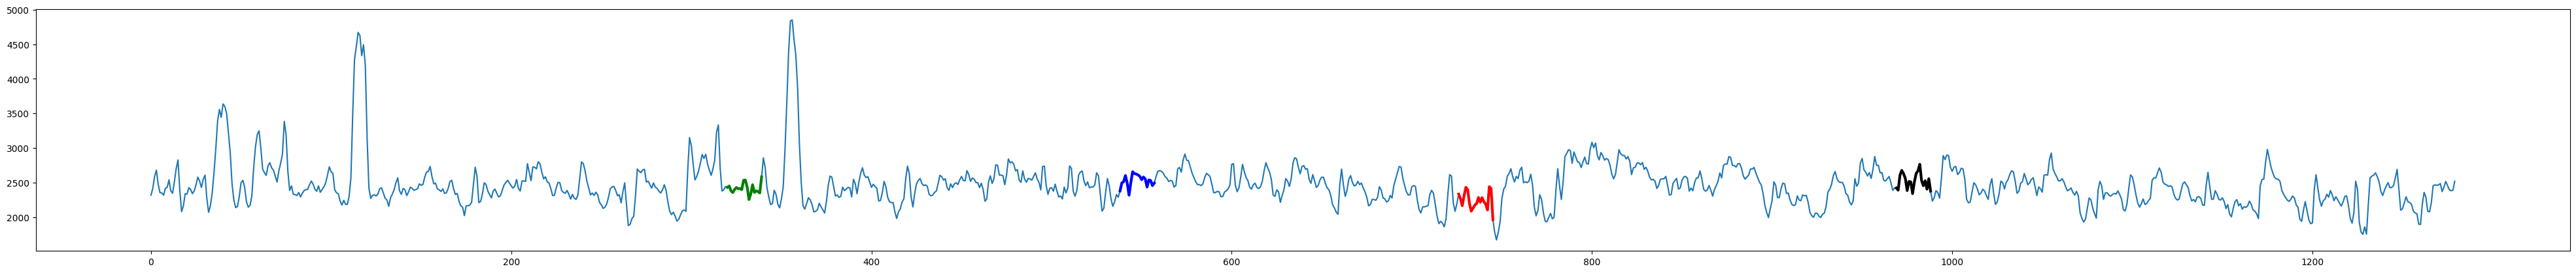

In [38]:
plt.figure().set_figwidth(50)
plt.plot(ts)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = ts[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

In [28]:
matrix_profile = stumpy.stump(ts.astype(float), m=12)

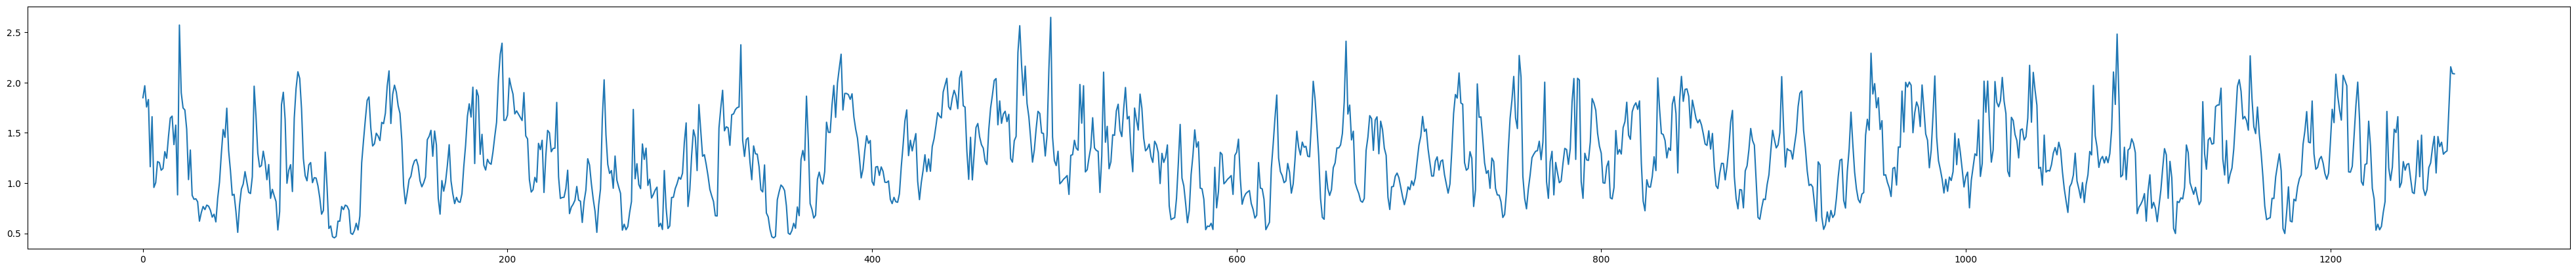

In [39]:
mp = matrix_profile[:,0]
mpi = matrix_profile[:,1]
plt.figure().set_figwidth(50)
plt.plot(mp)
plt.show()

In [33]:
from sktime.transformations.series.matrix_profile import MatrixProfileTransformer

In [34]:
transformer = MatrixProfileTransformer(12)  
mp = transformer.fit_transform(ts)  
mp[:10]

array([1.84874477, 1.96791315, 1.75689219, 1.8305687 , 1.16312369,
       1.66017471, 0.95672723, 1.00442651, 1.21357944, 1.20415743])